In [3]:
#Instalacao do lxml
pip install lxml

     |████████████████████████████████| 5.8MB 27.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bs4

     |████████████████████████████████| 112kB 9.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importando as bibliotecas
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this assignment.\
Use the Notebook to build the code to scrape the following Wikipedia page, \
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, \
in order to obtain the data that is in the table of postal codes and to \
transform the data into a pandas dataframe like the one shown below:

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood\
Only process the cells that have an assigned borough. \
Ignore cells with a borough that is Not assigned.\
More than one neighborhood can exist in one postal code area. \
For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. \
These two rows will be combined into one row with the neighborhoods separated with a comma as shown in \
row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.\
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.\
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.\
4. Submit a link to your Notebook on your Github repository. (10 marks)

In [2]:
#Coletando os dados do url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
#Exibindo uma previa da tabela, apresentam os dados None
data.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,None
1,M2A,Not assigned,None
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [4]:
#Selecionando os dados cuja a info na coluna Borough esta  diferente de NA
raw_data_selected = data[data['Borough'] != 'Not assigned']

In [5]:
#Agrupando os dados
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal code'], as_index=False).agg(','.join)


In [6]:
raw_data_selected.head()

,Borough,Postal code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,Moore Park / Summerhill East


In [7]:
#descobrindo a dimensao da matriz
raw_data_selected.describe()

,Borough,Postal code,Neighborhood
count,103,103,103
unique,10,103,98
top,North York,M4G,Downsview
freq,24,1,4


In [8]:
raw_data_selected.shape

(103, 3)

In [9]:
#Fazendo a importacao das coordenadas geograficas
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [10]:
#Demonstracao da tabela das coordenadas
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
# Deixando as colunas com o mesmo nome
geospatial_data.columns = ['Postal code', 'Latitude', 'Longitude']

In [12]:
#Mesclando as tabelas geospatial e raw selected data
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postal code')

In [13]:
merged_data.head()

,Borough,Postal code,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160


In [14]:
#Colocando a latitude e longitude numa coluna chamada coordenadas
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))
merged_data.head()

,Borough,Postal code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [45]:
pip install shapely


     |████████████████████████████████| 1.8MB 22.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
from shapely.geometry import Point

In [16]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [17]:
merged_data

,Borough,Postal code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,POINT (43.7153834 -79.40567840000001)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,POINT (43.6895743 -79.38315990000001)
...,...,...,...,...,...,...
98,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,POINT (43.6937813 -79.42819140000002)
99,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,POINT (43.6890256 -79.453512)
100,York,M6M,Del Ray / Mount Dennis / Keelsdale and Silvert...,43.691116,-79.476013,POINT (43.6911158 -79.47601329999999)
101,York,M6N,Runnymede / The Junction North,43.673185,-79.487262,POINT (43.67318529999999 -79.48726190000001)


In [24]:
pip install geopandas

     |████████████████████████████████| 931kB 22.2MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 6.8MB/s eta 0:00:011��███████████████████████████ | 14.3MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 7.2MB/s eta 0:00:01    |██████████████▊                 | 4.8MB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 24.5MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
Note: you may need to restart the kernel to use updated packages.


In [18]:
import geopandas as gpd

In [19]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [20]:
gdf.head()

,Borough,Postal code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.72802 -79.38879)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.71275 -79.39020)
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,POINT (43.71538 -79.40568)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.70432 -79.38879)
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,POINT (43.68957 -79.38316)


In [24]:
from matplotlib import pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


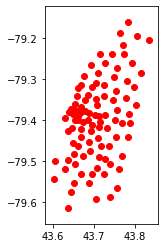

In [25]:
# criando um mapa
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()